In [1]:
%pylab inline
from pyannote.core import notebook

Populating the interactive namespace from numpy and matplotlib


# Segment (`pyannote.core.segment.Segment`)

In [2]:
from pyannote.core import Segment

**`Segment`** instances are used to describe temporal fragments (e.g. of an audio file).

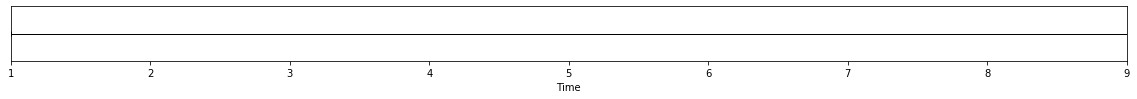

In [3]:
# start time in seconds
s = 1.
# end time in seconds
e = 9.
segment = Segment(start=s, end=e)
segment

**`Segment`** instances are nothing more than 2-tuples augmented with several useful methods and properties.

In [5]:
start, end = segment
print('from {} to {}'.format(start, end))

from 1.0 to 9.0


In [8]:
print('Segment %s ends at %g seconds.' % (segment, segment.end))
print('Its duration is %g seconds.' % (segment.duration))
print('Its middle stands as %g seconds.' % (segment.middle))

Segment [ 00:00:01.000 -->  00:00:09.000] ends at 9 seconds.
Its duration is 8 seconds.
Its middle stands as 5 seconds.


### Intersection

In [9]:
other_segment = Segment(4, 13)
if segment.intersects(other_segment):
    print('Segment %s intersects other segment %s.' % (segment, other_segment))
    intersection = segment & other_segment
    print('Their intersection is %s.' % (str(intersection)))

Segment [ 00:00:01.000 -->  00:00:09.000] intersects other segment [ 00:00:04.000 -->  00:00:13.000].
Their intersection is [ 00:00:04.000 -->  00:00:09.000].


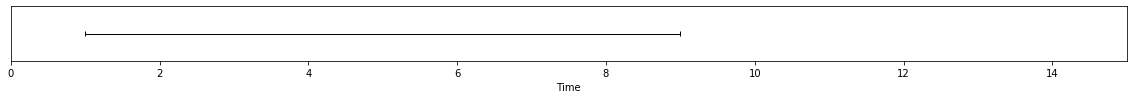

In [10]:
notebook.crop = Segment(0, 15)
segment

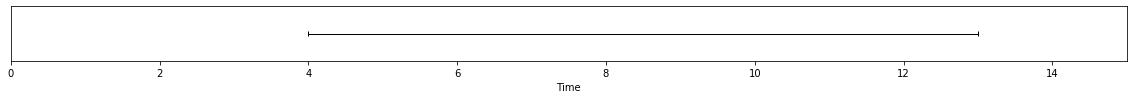

In [11]:
other_segment

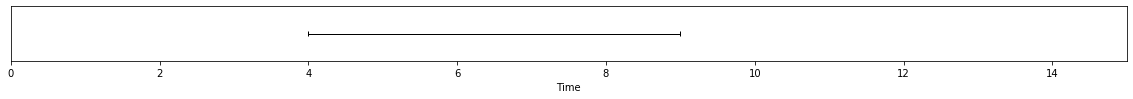

In [12]:
segment & other_segment

In [13]:
other_segment = Segment(13, 20)
if not (segment & other_segment):
    print('Those two segments do not intersect.')

Those two segments do not intersect.


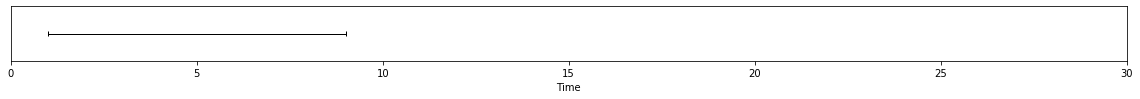

In [14]:
notebook.crop = Segment(0, 30)
segment

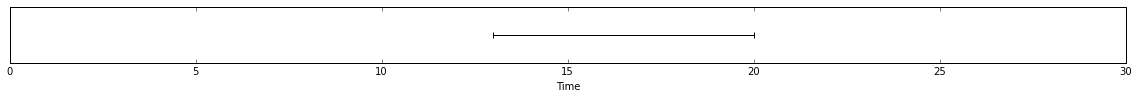

In [12]:
other_segment

### Inclusion

In [15]:
other_segment = Segment(5, 6)
if other_segment in segment:
    print('%s in included in %s' % (other_segment, segment))

[ 00:00:05.000 -->  00:00:06.000] in included in [ 00:00:01.000 -->  00:00:09.000]


In [16]:
t = 23.
if not segment.overlaps(t):
    print('%s does not contain time %f' % (segment, t))

[ 00:00:01.000 -->  00:00:09.000] does not contain time 23.000000


### Other operations

In [17]:
other_segment = Segment(10, 30)
print('Union of %s and %s is %s' % (segment, other_segment, segment | other_segment))

Union of [ 00:00:01.000 -->  00:00:09.000] and [ 00:00:10.000 -->  00:00:30.000] is [ 00:00:01.000 -->  00:00:30.000]


In [18]:
other_segment = Segment(14, 15)
print('Gap between %s and %s is %s' % (segment, other_segment, segment ^ other_segment))

Gap between [ 00:00:01.000 -->  00:00:09.000] and [ 00:00:14.000 -->  00:00:15.000] is [ 00:00:09.000 -->  00:00:14.000]


# SlidingWindow (`pyannote.core.segment.SlidingWindow`)

In [19]:
from pyannote.core import SlidingWindow, Timeline

### Iteration

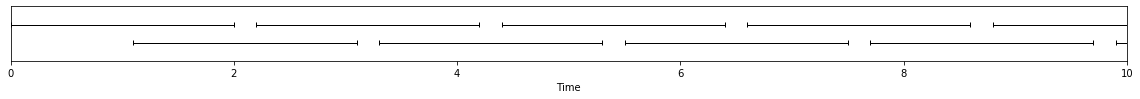

In [20]:
notebook.crop = Segment(0, 10)
window = SlidingWindow(start=0.0, step=1.1, duration=2., end=10.)
Timeline(window)

### Cropping

Given an interval, `.crop` can be used to return every position of the sliding window within this interval. 

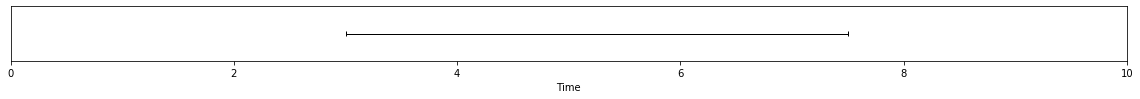

In [21]:
interval = Segment(3., 7.5)
interval

`strict` mode only returns fully contained positions.

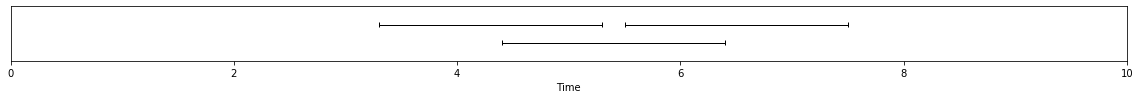

In [22]:
indices = window.crop(interval, mode='strict')
Timeline(window[i] for i in indices)

`loose` mode returns any intersecting position.

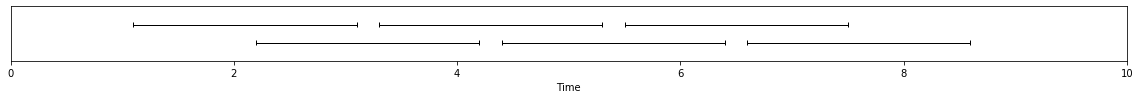

In [23]:
indices = window.crop(interval, mode='loose')
Timeline(window[i] for i in indices)

`center` mode centers first and last position on interval boundaries.

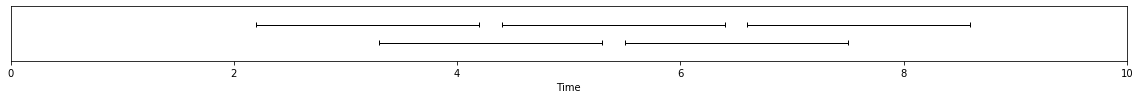

In [24]:
indices = window.crop(interval, mode='center')
Timeline(window[i] for i in indices)

### Need help?

You can always try the following...  
Who knows? It might give you the information you are looking for!

In [23]:
help(Segment)

Help on class Segment in module pyannote.core.segment:

class Segment(Segment)
 |  Temporal interval defined by its `start` and `end` times.
 |  
 |  Multiple segment operators are available -- including intersection (&),
 |  inclusion (in), emptiness test, start/end time shifting (+, -, >>, <<).
 |  They are illustrated in **Examples** section.
 |  
 |  Comparison of two segments is also available (==, !=, <, <=, >, >=).
 |  Two segments are equal iff they have identical start and end times.
 |  Segment S is smaller than segment T iff S.start < T.start or if they have
 |  the same start time and S.end < T.start.
 |  
 |  Parameters
 |  ----------
 |  start, end : float
 |      `start` and `end` times, in seconds.
 |  
 |  Returns
 |  -------
 |  segment : Segment
 |      New segment with `start` and `end` times.
 |  
 |  Examples
 |  --------
 |  Create a new temporal interval between 00:13.000 and 00:37.000.
 |  
 |      >>> segment = Segment(start=13., end=37)
 |      >>> print segm